In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import string
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler

import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import keyedvectors
from gensim.models import Word2Vec
import pickle

from sklearn.metrics import accuracy_score
from sklearn.cross_validation import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import cross_validation

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1209: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
def RandomForest(train_features, train_class, test_features, test_class):
    
    number_of_base_models = range(25,225,25)
    maximum_depths = [100,150,200,250,None]
    
    hyper_parameters ={'n_estimators': number_of_base_models, \
                        'max_depth' : maximum_depths}
    
    time_series_cv = TimeSeriesSplit(n_splits=5)
    
    model = GridSearchCV(RandomForestClassifier(class_weight = 'balanced', verbose = 1), hyper_parameters, cv=time_series_cv, \
                                        scoring='accuracy', verbose=1, n_jobs = -1)
    
    model.fit(train_features, train_class)
    print(model.best_estimator_)
    acc = model.score(test_features, test_class) * float(100)
    
    predictions = model.predict(test_features)

    f1 = f1_score(test_class, predictions) * float(100)
    precision = precision_score(test_class, predictions) * float(100)
    recall = recall_score(test_class, predictions) * float(100)
    
    print(f'Accuracy = {acc}') 
    print(f'F1 Score = {f1}') 
    print(f'Precision = {precision}') 
    print(f'Recall = {recall}') 
    
    plt.figure(1)

    x=[]
    y=[]
    for a in model.grid_scores_:
        x.append(a[0]['n_estimators']) 
        y.append(a[1])
    plt.xlim(-10,300)
    plt.ylim(0.2,1.0)
    plt.xlabel(r"n_estimators",fontsize=15)
    plt.ylabel("accuracy")
    plt.title(r'accuracy v/s n_estimators')
    plt.plot(x,y)
    plt.show()
    
    df_cm = pd.DataFrame(data=confusion_matrix(test_class, predictions),index=range(2),columns= ['Negative','Positive'])
    
    plt.figure(2)
    
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

    return model

In [3]:
def GradientBoosting(train_features, train_class, test_features, test_class):
    
    hyper_parameters = {'n_estimators' : [10,20,30],
                        'max_depth' : [3,4,5],
                        'learning_rate' : [0.01,0.05,0.1]}
    
    time_series_cv = TimeSeriesSplit(n_splits=5)
    
    model = GridSearchCV(XGBClassifier(silent = False), hyper_parameters, cv=time_series_cv, \
                                        scoring='accuracy', verbose=1, n_jobs = -1)
    
    model.fit(train_features, train_class)
    print(model.best_estimator_)
    acc = model.score(test_features, test_class) * float(100)
    
    predictions = model.predict(test_features)

    f1 = f1_score(test_class, predictions) * float(100)
    precision = precision_score(test_class, predictions) * float(100)
    recall = recall_score(test_class, predictions) * float(100)
    
    print(f'Accuracy = {acc}') 
    print(f'F1 Score = {f1}') 
    print(f'Precision = {precision}') 
    print(f'Recall = {recall}') 
    
    plt.figure(1)

    x=[]
    y=[]
    for a in model.grid_scores_:
        x.append(a[0]['n_estimators']) 
        y.append(a[1])
    plt.xlim(-10,300)
    plt.ylim(0.2,1.0)
    plt.xlabel(r"n_estimators",fontsize=15)
    plt.ylabel("accuracy")
    plt.title(r'accuracy v/s n_estimators')
    plt.plot(x,y)
    plt.show()
    
    df_cm = pd.DataFrame(data=confusion_matrix(test_class, predictions),index=range(2),columns= ['Negative','Positive'])
    
    plt.figure(2)
    
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16}, fmt='g')

    return model

In [3]:
#Functions to save objects for later use and retireve it
import pickle
def savetofile(obj,filename):
    pickle.dump(obj,open(filename+".p","wb"))
def openfromfile(filename):
    temp = pickle.load(open(filename+".p","rb"))
    return temp

The vectorization of reviews into multiple forms was very time consuming as i have a low configuration system.
So i stored the vectorizations from my previous assignments into pickle files and i am reading them here from the pickle files

I am using only average word to vec and tfidf word to vec becacuse the the bow and tfidf was taking more than 300 minutes on my system to execute

In [4]:
avg_X_tr = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\avg_X_tr') # Average word to vec train dataset
avg_X_test = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\avg_X_test') # Average word to vec test dataset
avgtfidf_X_tr = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\avgtfidf_X_tr') # tfidf word to vec train data test
avgtfidf_X_test = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\avgtfidf_X_test') # tfidf word to vec test data test
Y_train = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\Y_train') # train class variable
Y_test = openfromfile(r'D:\Studies\AppliedAi\AmazonFoodReviews\Y_test') # test class variable

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 37.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 39.8min finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  1.5min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=150, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=200, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Accuracy = 82.88888888888889
F1 Score = 81.47479850836041
Precision = 79.20711027949947
Recall = 83.87616099071208


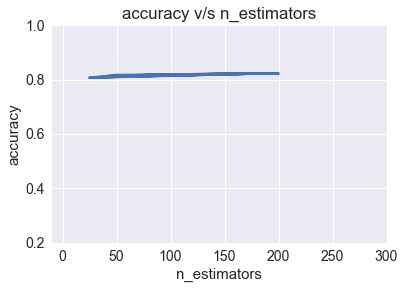

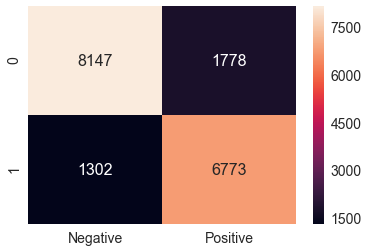

In [8]:
model = RandomForest(train_features = avg_X_tr, train_class = Y_train, \
                                     test_features = avg_X_test, test_class = Y_test)

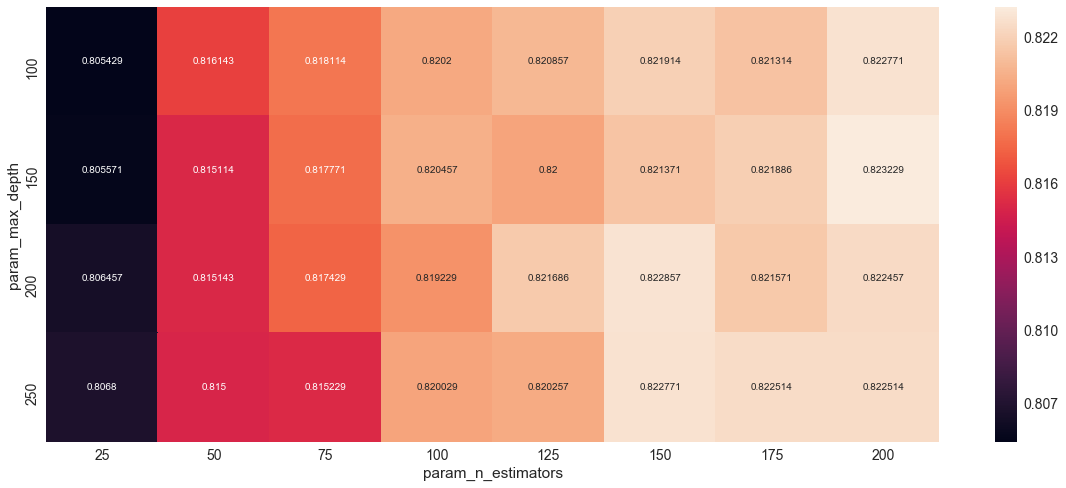

In [15]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_), \
    values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

width = 20
height = 8
plt.figure(figsize=(width, height))

sns.set(font_scale=1.4)#for label size
sns.heatmap(pvt, annot=True, annot_kws={"size":10}, fmt='g')

In [19]:
model.best_estimator_.feature_importances_

array([0.06855451, 0.02192151, 0.01061103, 0.01384672, 0.01220129,
       0.01174205, 0.05138172, 0.01054548, 0.01114144, 0.0137697 ,
       0.01514526, 0.01417081, 0.02202269, 0.02582814, 0.01080159,
       0.03452491, 0.01133324, 0.01381354, 0.0105389 , 0.0197134 ,
       0.01197957, 0.01138744, 0.01388886, 0.01215976, 0.02849878,
       0.01299059, 0.0118819 , 0.01802934, 0.01236581, 0.01503851,
       0.01767618, 0.01220494, 0.01033063, 0.01468629, 0.01146477,
       0.0108157 , 0.01754806, 0.01147498, 0.02784226, 0.07319201,
       0.01248669, 0.01047275, 0.03410275, 0.03012231, 0.01106953,
       0.0298299 , 0.02305939, 0.06599619, 0.011589  , 0.01220716])

# I do not know how to get feature importance from Average word to Vector

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  5.1min finished


[09:42:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:13] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:15] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:42:16] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Accuracy = 81.31666666666668
F1 Score = 79.82966472740358
Precision = 77.40172133054199
Recall = 82.41486068111456


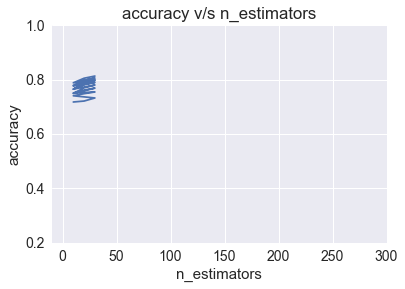

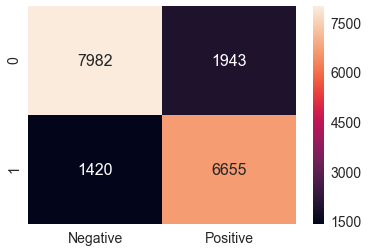

In [7]:
model = GradientBoosting(train_features = avg_X_tr, train_class = Y_train, \
                                     test_features = avg_X_test, test_class = Y_test)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 32.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 35.2min finished
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=200, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=None,
            verbose=1, warm_start=False)


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished


Accuracy = 79.96666666666667
F1 Score = 78.54848304580607
Precision = 75.58099599313108
Recall = 81.75851393188854


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


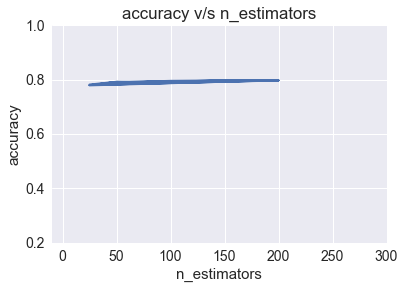

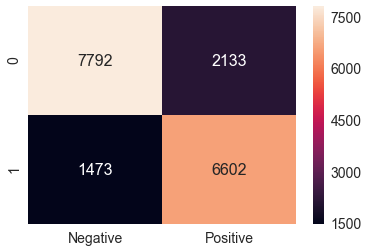

In [20]:
model = RandomForest(train_features = avgtfidf_X_tr, train_class = Y_train, \
                                     test_features = avgtfidf_X_test, test_class = Y_test)

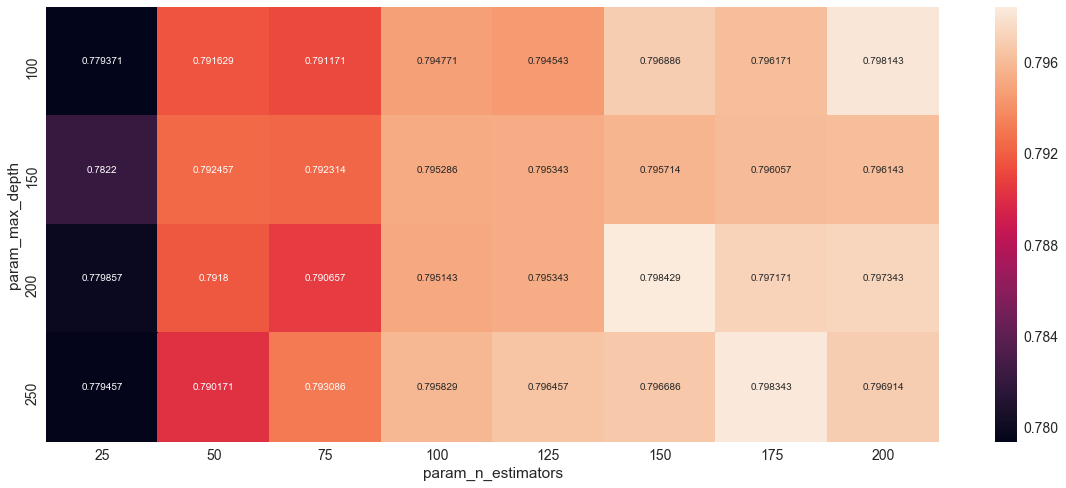

In [21]:
pvt = pd.pivot_table(pd.DataFrame(model.cv_results_), \
    values='mean_test_score', index='param_max_depth', columns='param_n_estimators')

width = 20
height = 8
plt.figure(figsize=(width, height))

sns.set(font_scale=1.4)#for label size
sns.heatmap(pvt, annot=True, annot_kws={"size":10}, fmt='g')

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  5.0min finished


[09:48:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:18] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:20] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 62 extra nodes, 0 pruned nodes, max_depth=5
[09:48:21] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


Accuracy = 78.48333333333333
F1 Score = 77.06248149244892
Precision = 73.84790011350738
Recall = 80.56965944272446


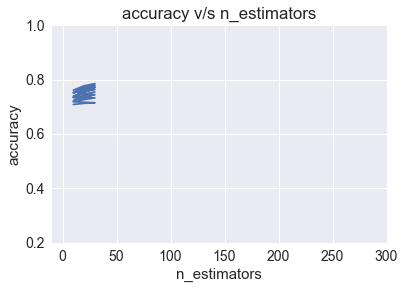

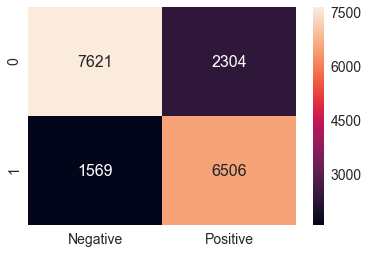

In [9]:
model = GradientBoosting(train_features = avgtfidf_X_tr, train_class = Y_train, \
                                     test_features = avgtfidf_X_test, test_class = Y_test)

# Summary

Random forest - Average word to vec - 82.3277 

GBDT - Average word to vec - 81.3166

Random forest - Tfidf word to vec - 79.1555

GBDT - Tfidf word to vec - 78.4833